In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import vorpy as vp
from stdpaths import linepath, ringpath

/home/crashoverride/miniforge3/envs/2024_05_work/lib/python3.12/site-packages/juliacall/__init__.py:237: UserWarning: Julia was started with multiple threads but multithreading support is experimental in JuliaCall. It is recommended to restart Python with the environment variable PYTHON_JULIACALL_HANDLE_SIGNALS=yes set, otherwise you may experience segfaults or other crashes. Note however that this interferes with Python's own signal handling, so for example Ctrl-C will not raise KeyboardInterrupt. See https://juliapy.github.io/PythonCall.jl/stable/faq/#Is-PythonCall/JuliaCall-thread-safe? for further information. You can suppress this warning by setting PYTHON_JULIACALL_HANDLE_SIGNALS=no.
  warnings.warn(


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


  Activating project at `~/Dropbox/code/vorpy/julia`


In [2]:
THREADED = False

In [3]:
DTYP = np.float64
LINELENGTH = 10_000
NUMSEGMENTS = 1
print('Segment length:', LINELENGTH/NUMSEGMENTS)
CRADIUS = 5
CIRCULATION = 1
vor = linepath(LINELENGTH, NUMSEGMENTS, DTYP, CRADIUS, CIRCULATION)

NUMFPS = 100
FPI = 1
FPF = 60
fps = np.zeros((NUMFPS, 3), dtype=DTYP)
fps[:, 1] = np.linspace(FPI, FPF, num=NUMFPS, dtype=DTYP)

Segment length: 10000.0


In [4]:
vor

vorpath(vpps=
	array([[-5000.,     0.,     0.],
       [ 5000.,     0.,     0.]]),
	crads=
	array([5., 5.]),
	circs=
	array([1., 1.]))

In [5]:
t0 = time.time_ns()
velnum = vor.velfp(fps, 1e-6, 1e1, THREADED)
velana = vor.velfp_lamboseen(fps)
t1 = time.time_ns()
print(f"Elapsed time: {(t1 - t0) / 1e6} ms")

Elapsed time: 1610.426166 ms


In [6]:
display(velana)
display(velnum[:, 2])

array([0.00315148, 0.00495287, 0.00665236, 0.00821877, 0.00962676,
       0.01085772, 0.01190011, 0.01274945, 0.01340784, 0.01388321,
       0.01418828, 0.01433939, 0.01435532, 0.0142561 , 0.01406196,
       0.01379246, 0.01346581, 0.01309834, 0.01270427, 0.01229554,
       0.01188188, 0.01147094, 0.01106847, 0.01067859, 0.01030407,
       0.00994658, 0.00960691, 0.00928522, 0.00898122, 0.00869429,
       0.0084236 , 0.00816822, 0.0079272 , 0.00769954, 0.00748431,
       0.0072806 , 0.00708758, 0.00690445, 0.00673051, 0.00656509,
       0.00640759, 0.00625747, 0.00611421, 0.00597736, 0.00584651,
       0.00572126, 0.00560126, 0.00548619, 0.00537576, 0.00526968,
       0.00516771, 0.00506961, 0.00497516, 0.00488417, 0.00479645,
       0.00471182, 0.00463013, 0.00455122, 0.00447496, 0.00440121,
       0.00432985, 0.00426077, 0.00419386, 0.00412902, 0.00406615,
       0.00400517, 0.00394599, 0.00388853, 0.00383273, 0.0037785 ,
       0.00372578, 0.00367452, 0.00362465, 0.00357611, 0.00352

array([0.0031594 , 0.00496418, 0.00666595, 0.00823481, 0.00964535,
       0.01087845, 0.01192222, 0.01277205, 0.01343012, 0.01390457,
       0.01420832, 0.01435793, 0.01437228, 0.01427146, 0.01407574,
       0.01380468, 0.01347648, 0.0131075 , 0.012712  , 0.01230194,
       0.01188709, 0.01147511, 0.01107175, 0.01068114, 0.01030601,
       0.00994799, 0.00960786, 0.0092858 , 0.00898152, 0.00869441,
       0.00842365, 0.00816831, 0.00792736, 0.00769977, 0.00748457,
       0.00728084, 0.00708779, 0.00690464, 0.00673063, 0.00656511,
       0.00640755, 0.00625741, 0.00611414, 0.00597729, 0.00584642,
       0.00572117, 0.00560117, 0.0054861 , 0.00537566, 0.00526958,
       0.00516761, 0.00506951, 0.00497506, 0.00488407, 0.00479634,
       0.00471172, 0.00463002, 0.00455111, 0.00447485, 0.0044011 ,
       0.00432974, 0.00426065, 0.00419374, 0.0041289 , 0.00406603,
       0.00400504, 0.00394586, 0.0038884 , 0.00383259, 0.00377836,
       0.00372565, 0.00367438, 0.00362451, 0.00357597, 0.00352

Mean error: 3.374759049211652e-06
Max error: 2.2599261232230175e-05
Min error: 2.050408421955946e-08


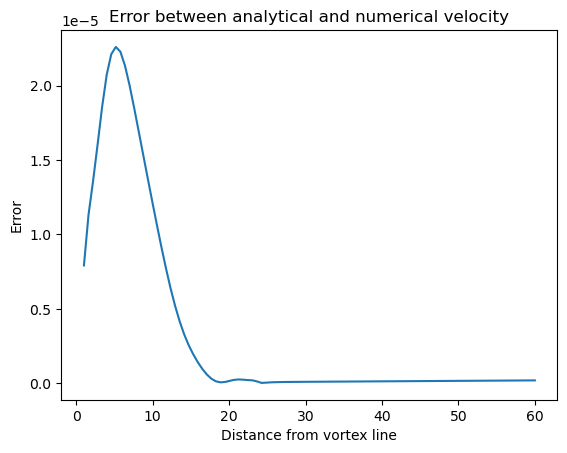

In [7]:
errvec = np.abs(velana - velnum[:, 2])
print('Mean error:', np.mean(errvec))
print('Max error:', np.max(errvec))
print('Min error:', np.min(errvec))

plt.plot(fps[:, 1], errvec)
plt.title('Error between analytical and numerical velocity')
plt.xlabel('Distance from vortex line')
plt.ylabel('Error')
plt.show()

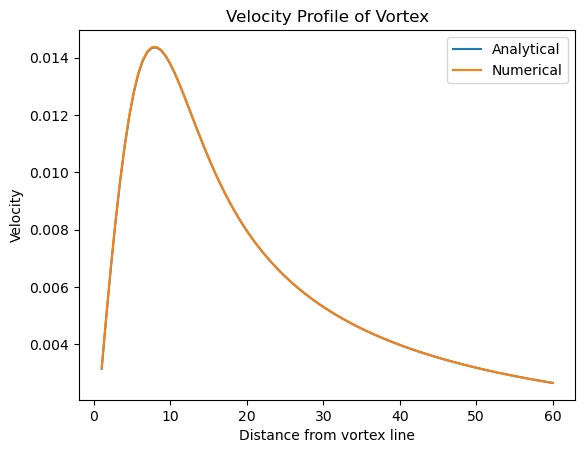

In [8]:
plt.plot(fps[:, 1], velana, label='Analytical')
plt.plot(fps[:, 1], velnum[:, 2], label='Numerical')
plt.title('Velocity Profile of Vortex')
plt.xlabel('Distance from vortex line')
plt.ylabel('Velocity')
plt.legend()
# plt.ylim(0, 2)
plt.show()

In [22]:
DTYP = np.float64
RADIUS = 1
crad = DTYP(RADIUS * 1e-3)
CIRC = 1
NUMSEGMENTS = 100

vpring = ringpath(RADIUS, NUMSEGMENTS, DTYP, crad, CIRC)

In [23]:
velring = vpring.vel(1e-6, 1e-4, THREADED)

In [24]:
display(velring)

array([[0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.        , 0.        , 6.32535511],
       [0.

In [25]:
print(velring[0])
scl = 1e-0
print(vpring.vel_onring_infthin*scl)
print(vpring.vel_onring_infthin*scl - velring[0, 2])

[0.         0.         6.32535511]
0.6431947201323392
-5.682160390675466


time: 0.0  vel: 6.325355110807805
time: 0.01  vel: 6.325355110807805
time: 0.02  vel: 6.325355110821284
time: 0.03  vel: 6.325355110847053
time: 0.04  vel: 6.3253551070554215
time: 0.05  vel: 6.3253550919639165
time: 0.06  vel: 6.325355848425326
time: 0.07  vel: 6.325360515099391
time: 0.08  vel: 6.325209463104718
time: 0.09  vel: 6.323915909326995
time: 0.1  vel: 6.356702116200035
time: 0.11  vel: 6.7221781498291
time: 0.12  vel: 0.19609054842241802
time: 0.13  vel: -0.768378582834537
time: 0.14  vel: -0.28673977505001697
[[0.         0.         6.32535511]
 [0.         0.         6.32535511]
 [0.         0.         6.32535511]
 [0.         0.         6.32535511]
 [0.         0.         6.32535511]
 [0.         0.         6.32535511]
 [0.         0.         6.32535511]
 [0.         0.         6.32535511]
 [0.         0.         6.32535511]
 [0.         0.         6.32535511]
 [0.         0.         6.32535511]
 [0.         0.         6.32535511]
 [0.         0.         6.32535511]
 [0

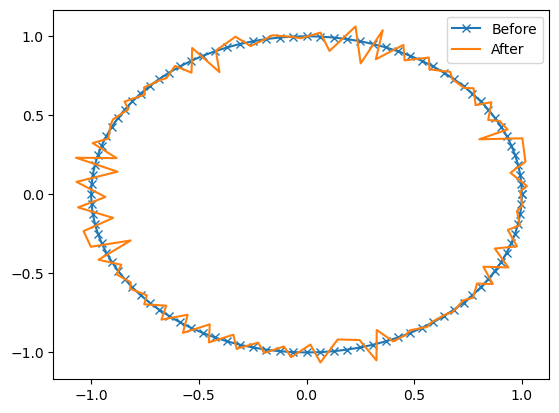

In [26]:
epsilon = 1e-2
vppsbefore = vpring.vpps.copy()
velringbefore = vpring.vel(1e-6, 1e-4, THREADED)
for tstep in np.arange(0, 0.15, epsilon):
    velring = vpring.vel(1e-6, 1e-4, THREADED)
    vpring.vpps += epsilon * velring
    print('time:', tstep, ' vel:', velring[0, 2])


vppsafter = vpring.vpps.copy()
velringafter = vpring.vel(1e-6, 1e-4, THREADED)
print(velringbefore)
print(velringafter)
print(velringafter - velringbefore)

plt.plot(vppsbefore[:, 0], vppsbefore[:, 1], 'x-', label='Before')
plt.plot(vppsafter[:, 0], vppsafter[:, 1], label='After')
plt.legend()
plt.show()